In [1]:
# Step 1: Define strategies and payoffs
strategies = ['Cooperate', 'Defect']

# Payoff Matrix:
# Each entry is (A's payoff, B's payoff)
payoff_matrix = {
    ('Cooperate', 'Cooperate'): (3, 3),
    ('Cooperate', 'Defect'):    (0, 5),
    ('Defect', 'Cooperate'):    (5, 0),
    ('Defect', 'Defect'):       (1, 1)
}


In [2]:
# Step 2: Get players' choices
print("Prisoner's Dilemma")
print("Available strategies:", strategies)

choice_A = input("Player A: Choose your strategy (Cooperate/Defect): ")
choice_B = input("Player B: Choose your strategy (Cooperate/Defect): ")

# Validate choices
if (choice_A not in strategies) or (choice_B not in strategies):
    print("Invalid strategy selected.")
else:
    # Fetch and display payoff
    payoff = payoff_matrix[(choice_A, choice_B)]
    print(f"\nPlayer A chose {choice_A}, Player B chose {choice_B}")
    print(f"Payoffs → A: {payoff[0]}, B: {payoff[1]}")


Prisoner's Dilemma
Available strategies: ['Cooperate', 'Defect']
Player A: Choose your strategy (Cooperate/Defect): Cooperate
Player B: Choose your strategy (Cooperate/Defect): Cooperate

Player A chose Cooperate, Player B chose Cooperate
Payoffs → A: 3, B: 3


In [3]:
!pip install nashpy

In [4]:
import nashpy as nash
import numpy as np

# Define the payoff matrices
# Rows = Player A (Cooperate, Defect)
# Cols = Player B (Cooperate, Defect)

# Player A's payoffs
A_payoff = np.array([
    [3, 0],  # A cooperates → B cooperates or defects
    [5, 1]   # A defects → B cooperates or defects
])

# Player B's payoffs
B_payoff = np.array([
    [3, 5],  # B cooperates → A cooperates or defects
    [0, 1]   # B defects → A cooperates or defects
])

# Create the game
game = nash.Game(A_payoff, B_payoff)
print("Game defined:")
print(game)


Game defined:
Bi matrix game with payoff matrices:

Row player:
[[3 0]
 [5 1]]

Column player:
[[3 5]
 [0 1]]


In [5]:
# Find all Nash Equilibria (including mixed strategies)
equilibria = list(game.support_enumeration())

print("\nNash Equilibrium (supports shown as probability vectors):")
for eq in equilibria:
    print(f"Player A: {eq[0]} | Player B: {eq[1]}")



Nash Equilibrium (supports shown as probability vectors):
Player A: [0. 1.] | Player B: [0. 1.]


In [6]:
import nashpy as nash
import numpy as np

# Define payoff matrices
A_payoff = np.array([[3, 0], [5, 1]])
B_payoff = np.array([[3, 5], [0, 1]])

# Create the game
game = nash.Game(A_payoff, B_payoff)

# Compute Nash Equilibria (including mixed)
equilibria = list(game.support_enumeration())

print("\n🔍 Nash Equilibrium(s) - Mixed Strategy Probabilities:")
for eq in equilibria:
    A_strategy, B_strategy = eq
    print(f"Player A: Cooperate={A_strategy[0]:.2f}, Defect={A_strategy[1]:.2f}")
    print(f"Player B: Cooperate={B_strategy[0]:.2f}, Defect={B_strategy[1]:.2f}")
    print()



🔍 Nash Equilibrium(s) - Mixed Strategy Probabilities:
Player A: Cooperate=0.00, Defect=1.00
Player B: Cooperate=0.00, Defect=1.00



In [7]:
# Matching Pennies (zero-sum game with no pure NE)
A = np.array([[1, -1], [-1, 1]])
B = -A
game = nash.Game(A, B)

print("Matching Pennies Mixed Strategy Equilibria:")
for eq in game.support_enumeration():
    print(eq)


Matching Pennies Mixed Strategy Equilibria:
(array([0.5, 0.5]), array([0.5, 0.5]))


In [8]:
import random

# Strategies
strategies = ["Cooperate", "Defect"]

# Payoff Matrix
payoffs = {
    ("Cooperate", "Cooperate"): (3, 3),
    ("Cooperate", "Defect"): (0, 5),
    ("Defect", "Cooperate"): (5, 0),
    ("Defect", "Defect"): (1, 1)
}

# Player strategies: can make one Tit-for-Tat, one Random
def tit_for_tat(last_opponent_move):
    return last_opponent_move if last_opponent_move else "Cooperate"

def random_strategy():
    return random.choice(strategies)

# Simulate Iterated Game
def play_iterated_game(rounds=5):
    print(f"\n🎲 Starting Iterated Prisoner's Dilemma for {rounds} rounds")

    A_score = 0
    B_score = 0

    last_A, last_B = None, None

    for r in range(1, rounds + 1):
        A_move = tit_for_tat(last_B)
        B_move = random_strategy()

        payoff_A, payoff_B = payoffs[(A_move, B_move)]
        A_score += payoff_A
        B_score += payoff_B

        print(f"Round {r}: A → {A_move} | B → {B_move} → Scores: A={payoff_A}, B={payoff_B}")

        last_A, last_B = A_move, B_move

    print(f"\nFinal Score after {rounds} rounds → Player A: {A_score}, Player B: {B_score}")


In [9]:
if __name__ == "__main__":
    play_iterated_game(10)



🎲 Starting Iterated Prisoner's Dilemma for 10 rounds
Round 1: A → Cooperate | B → Defect → Scores: A=0, B=5
Round 2: A → Defect | B → Cooperate → Scores: A=5, B=0
Round 3: A → Cooperate | B → Defect → Scores: A=0, B=5
Round 4: A → Defect | B → Defect → Scores: A=1, B=1
Round 5: A → Defect | B → Cooperate → Scores: A=5, B=0
Round 6: A → Cooperate | B → Cooperate → Scores: A=3, B=3
Round 7: A → Cooperate | B → Defect → Scores: A=0, B=5
Round 8: A → Defect | B → Defect → Scores: A=1, B=1
Round 9: A → Defect | B → Cooperate → Scores: A=5, B=0
Round 10: A → Cooperate | B → Defect → Scores: A=0, B=5

Final Score after 10 rounds → Player A: 20, Player B: 25


In [10]:
!pip install matplotlib

In [11]:
import random
import matplotlib.pyplot as plt

# Define strategies
strategies = ["Cooperate", "Defect"]

# Define Payoff Matrix
payoffs = {
    ("Cooperate", "Cooperate"): (3, 3),
    ("Cooperate", "Defect"): (0, 5),
    ("Defect", "Cooperate"): (5, 0),
    ("Defect", "Defect"): (1, 1)
}

In [12]:
# Player A: Tit for Tat
def tit_for_tat(last_opponent_move):
    return last_opponent_move if last_opponent_move else "Cooperate"

In [13]:
# Player B: Random
def random_strategy():
    return random.choice(strategies)


🎲 Starting Iterated Prisoner's Dilemma for 10 rounds
Round 1: A → Cooperate | B → Cooperate → Scores: A=3, B=3
Round 2: A → Cooperate | B → Defect → Scores: A=0, B=5
Round 3: A → Defect | B → Defect → Scores: A=1, B=1
Round 4: A → Defect | B → Cooperate → Scores: A=5, B=0
Round 5: A → Cooperate | B → Defect → Scores: A=0, B=5
Round 6: A → Defect | B → Cooperate → Scores: A=5, B=0
Round 7: A → Cooperate | B → Cooperate → Scores: A=3, B=3
Round 8: A → Cooperate | B → Defect → Scores: A=0, B=5
Round 9: A → Defect | B → Defect → Scores: A=1, B=1
Round 10: A → Defect | B → Defect → Scores: A=1, B=1

Final Score → A: 19, B: 24


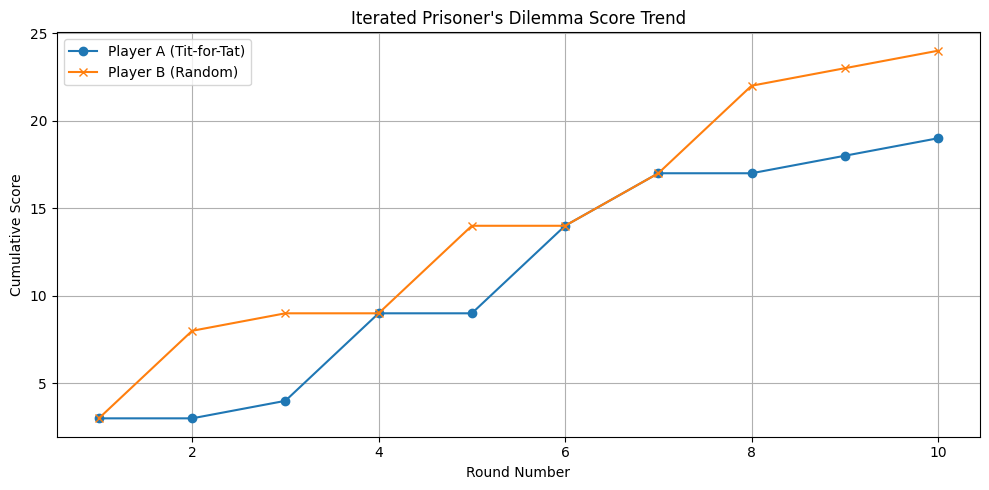

In [14]:
# Iterated Prisoner's Dilemma Game with Plotting
def play_iterated_game(rounds=10):
    print(f"\n🎲 Starting Iterated Prisoner's Dilemma for {rounds} rounds")

    A_score = 0
    B_score = 0

    A_scores = []
    B_scores = []

    last_A, last_B = None, None

    for r in range(1, rounds + 1):
        A_move = tit_for_tat(last_B)
        B_move = random_strategy()

        payoff_A, payoff_B = payoffs[(A_move, B_move)]
        A_score += payoff_A
        B_score += payoff_B

        A_scores.append(A_score)
        B_scores.append(B_score)

        print(f"Round {r}: A → {A_move} | B → {B_move} → Scores: A={payoff_A}, B={payoff_B}")

        last_A, last_B = A_move, B_move

    print(f"\nFinal Score → A: {A_score}, B: {B_score}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, rounds+1), A_scores, label="Player A (Tit-for-Tat)", marker='o')
    plt.plot(range(1, rounds+1), B_scores, label="Player B (Random)", marker='x')
    plt.xlabel("Round Number")
    plt.ylabel("Cumulative Score")
    plt.title("Iterated Prisoner's Dilemma Score Trend")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run
if __name__ == "__main__":
    play_iterated_game(rounds=10)
